In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
#fitness function
def fitness_function(genotype, benefits, volumes, max_volume):
    """Calculate individual's fitness
    Args:
        genotype (np.array): Individuals genotype (np.array of 0's and 1's)
        volumes (np.array): Volumes of items.
        benefits (np.array): Prize for corresponding volumes.
        max_volume (int): Maximum allowed total of volumes.

    Returns:
        int: Individual's fitness
    """
    ind_vol = np.sum(genotype*volumes)
    ind_fitness = np.sum(genotype*benefits)
    if(ind_vol > max_volume): return 0
    return ind_fitness

#mutation function
def mutate(genotype,rate):
  """Mutates individual's genotype by flipping each gene with some probability.

  Args:
      genotype (np.array): Individual's genotype.
      rate (float): Chance of a single gene to mutate (0.0 to 1.0).

  Returns:
      np.array: Mutated genotype (genotype.shape).
  """
  child = np.copy(genotype)
  inds = np.random.choice([True,False],p=[rate,1-rate],size=child.shape)
  child[inds] = 1 - child[inds]
  return child

#get winner loser
def get_winner_loser(ind_1,ind_2,population,benefits,volumes,max_volume):
    """Compares individuals by their fitnesses.

    Args:
        ind_1 (int): First individual's index in (np.array)population.
        ind_2 (int): Second individual's index in (np.array)population.
        population (np.array(np.array)): List of all individuals' genotypes.
        benefits (np.array): List if benefits for corresponding volume from (np.arrray)volumes.
        volumes (np.array): List of possible volumes.
        max_volume (int): The max of total volumes.

    Returns:
        (int, int):Indecies of individuals in order: (winner, loser)
    """
    if (fitness_function(population[ind_1],benefits,volumes,max_volume)>=fitness_function(population[ind_2],benefits,volumes,max_volume)):
        return ind_1,ind_2
    else:
        return ind_2,ind_1

# get two individuals from population at random
def random_inidividuals(population):
    """Picks two individuals at random from the population

    Args:
        population ((np.array(np.array))): List of all individuals' genotypes.

    Returns:
        (int, int): Indecies of individuals.
    """
    ind_1 = np.random.randint(0,len(population))
    ind_2 = np.random.randint(ind_1+1, len(population)+ind_1)%len(population) # pick another random individual different than first pick
    return ind_1,ind_2

# get two inidividuals from neighbourhood
def neighbours(population,k):
    """Get two individulals from close neighbourhood.

    Args:
        population (np.array(np.array)): List of all individuals' genotypes.
        k (int): Neighbourhood size.

    Returns:
        (int, int): Two individuals' indicies.
    """
    idx = np.random.randint(0,population.shape[0])
    neighbour_idx = np.random.randint(idx+1, idx + k)%population.shape[0] # pick random neighbour
    return idx,neighbour_idx

# crossover function
def make_love(W,L,prob):
    """Copies each gene from winner(W) to loser(L) with some probability(prob).

    Args:
        W (np.array): Stronger individual's genotype.
        L (np.array): Loser individual's genotype.
        prob (float, optional): Crossover probability. Defaults to .5.

    Returns:
        np.array: Offspring's genotype.
    """
    C = np.copy(W)
    for i in range(W.shape[0]):
        C[i] = np.random.choice([W[i],L[i]],p=[prob,1-prob])
    return C
    
#full microbial GA
def full_microbial(volumes, benefits, max_volume,n_turns,population_size=10, deme_size=3,crossover_rate=.5,mutation_rate=None,population=None):
  """Full microbial GA

  Args:
      n_turns (int): Number of tournaments
      population_size (int): Population size, ignored when <c>population</c> specified.
      volumes (np.array): List of volumes.
      max_volume (int): Max volume.
      benefits (np.array): List of benefits associated to volumes.
      deme_size (float, optional): Neighbourhood size. Default: 3
      crossover_rate (float, optional): Crossover probability. Default: 0.5
      mutation_rate (float, optional): Mutation rate (0.0 to 1.0). Default: 1/(n_genes)
      population (np.array): The hillclimbers population (population_size,n_genes)

  Returns:
      (np.array,np.array): Fitnesses across tournaments (population_size,n_turns) and the evolved population (population_size).
  """
  if population is None:
    population = np.random.choice([0,1], (population_size, volumes.shape[0]))
  shapes = np.array([population.shape[1],volumes.shape[0],benefits.shape[0]])
  assert np.all(shapes == shapes[0]), 'Incosistent number of genes: population({}),volumes({}),benefits({})'.format(population.shape[1],volumes.shape[0],benefits.shape[0])
  if mutation_rate is None: mutation_rate = 1/population.shape[1]
  fitnesses = np.zeros((population.shape[0],n_turns))
  for i in range(fitnesses.shape[0]):
      fitnesses[i][0] = fitness_function(population[i],benefits,volumes,max_volume)
  for t in range(1,n_turns):
      B1_i,B2_i = neighbours(population,deme_size)
      winner,loser = get_winner_loser(B1_i,B2_i,population,benefits,volumes,max_volume)
      population[loser] = mutate(make_love(population[winner],population[loser],crossover_rate),mutation_rate)
      for i in range(fitnesses.shape[0]):
          fitnesses[i][t] = fitness_function(population[i],benefits,volumes,max_volume)
  return fitnesses

In [47]:
#define the problem
genotype_size = 40
volumes = np.random.rand(genotype_size)
max_volume = volumes.sum()/2
benefits = np.random.rand(genotype_size)

In [4]:
volumes.sum()

20.360076367026302

In [42]:
#params
n_individuals = 10
n_turns = 1000
params = {
"population_size" : 10,
"deme_size" : 3,
"crossover_rate" : .5,
"mutation_rate" : 1/genotype_size,
"population" : None
}
population_initial = np.random.choice([0,1], (n_individuals, genotype_size))

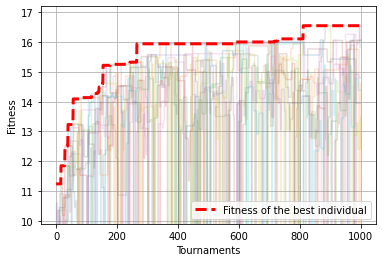

In [55]:
#a single run with default params
P = population_initial.copy()
fitnesses =  full_microbial(volumes,benefits,max_volume,n_turns,**params)
plt.plot(range(n_turns),list(zip(*fitnesses)),alpha=.2)
plt.plot(range(n_turns),np.max(fitnesses,axis=0),linestyle='dashed',linewidth=3,color="r",label='Fitness of the best individual')
plt.xlabel('Tournaments')
plt.ylabel('Fitness')
plt.ylim(9.9,17.2)
plt.legend(loc=4)
plt.grid()

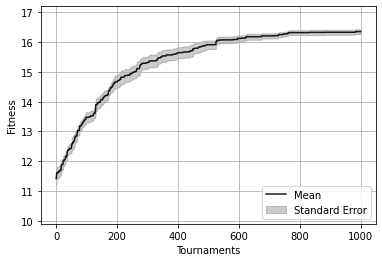

In [58]:
def run_multiple(n_runs,n_turns,volumes,benefits,max_volume,**params):
  """Runs <c>full_macrobial</c> n_runs times.

  Args:
      n_runs (int): Number of runs
      n_turns (int): Number of tournaments
      volumes (np.array): List of volumes.
      max_volume (int): Max volume.
      benefits (np.array): List of benefits associated to volumes.
      **params:
        deme_size (float, optional): Neighbourhood size. Default: 3
        population_size (int): size of population
        crossover_rate (float, optional): Crossover probability. Default: 0.5
        mutation_rate (float, optional): Mutation rate (0.0 to 1.0). Default: 1/(n_genes)
        population (np.array): The hillclimbers population (n_inidividuals,n_genes) (optional)

  Returns:
      np.array: Fitnesses of the champions across the runs (n_champions,n_turns).
  """
  champions = np.zeros((n_runs,n_turns))
  for i in range(n_runs):
    champions[i] = np.max(full_microbial(volumes,benefits,max_volume,n_turns,**params),axis=0)
  return champions

n_runs = 10

#runs with default params
champions = run_multiple(n_runs,n_turns,volumes,benefits,max_volume,**params)
means = np.mean(champions,axis=0)
ses = np.std(champions,axis=0) / np.sqrt(champions.shape[0])
plt.plot(range(n_turns),means,alpha=.9,label='Mean',color='k')
plt.fill_between(range(n_turns),means+ses,means-ses,alpha=.2,label='Standard Error'.format(1),color='k')
plt.xlabel('Tournaments')
plt.ylabel('Fitness')
plt.ylim(9.9,17.2)
plt.legend(loc=4)
plt.grid()

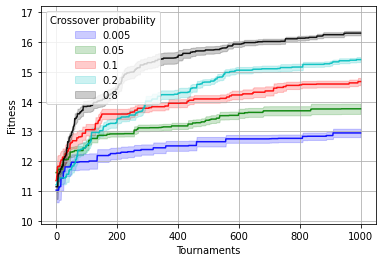

In [59]:
#runs with different crossover probability
n_runs = 10
probs = [.005,.05,.10,.20,.8]
colors=['b','g','r','c','k']
for i in range(len(probs)):
  champions = run_multiple(n_runs,n_turns,volumes,benefits,max_volume,crossover_rate = probs[i])
  means = np.mean(champions,axis=0)
  ses = np.std(champions,axis=0) / np.sqrt(champions.shape[0])
  plt.plot(range(n_turns),means,alpha=.9,color=colors[i])
  plt.fill_between(range(n_turns),means+ses,means-ses,alpha=.2,label='{}'.format(probs[i]),color=colors[i])
plt.xlabel('Tournaments')
plt.ylabel('Fitness')
plt.legend(loc=2,title="Crossover probability")
plt.ylim(9.9,17.2)
plt.grid()
plt.show()

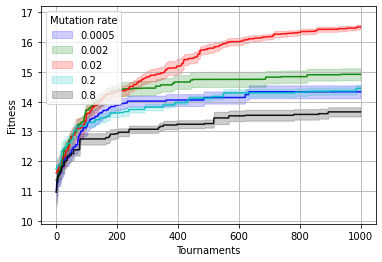

In [60]:
# runs with different mutation rate
n_runs = 10
rates = [.0005,.002,.02,.20,.80]
colors=['b','g','r','c','k']
for i in range(len(rates)):
  champions = run_multiple(n_runs,n_turns,volumes,benefits,max_volume, mutation_rate = rates[i])
  means = np.mean(champions,axis=0)
  ses = np.std(champions,axis=0) / np.sqrt(champions.shape[0])
  plt.plot(range(n_turns),means,alpha=.9,color=colors[i])
  plt.fill_between(range(n_turns),means+ses,means-ses,alpha=.2,label='{}'.format(rates[i]),color=colors[i])
plt.xlabel('Tournaments')
plt.ylabel('Fitness')
plt.legend(loc=2,title="Mutation rate")
plt.ylim(9.9,17.2)
plt.grid()
plt.show()

In [27]:
# # runs with different crossover probability and mutation rate
n_runs = 10
rates = [.0005,.002,.02,.08,.2,.5,.7,.9]
probs = [.005,.05,.10,.20,.5,.8]
fit_n_ses = np.zeros((len(probs),len(rates),2))
for p in range(len(probs)):
  for r in range(len(rates)):
    chaps = run_multiple(n_runs,n_turns,volumes,benefits,max_volume,crossover_rate = probs[p],mutation_rate=rates[r])
    fit_n_ses[p,r,0]=np.mean(chaps[:,-1],axis=0)
    fit_n_ses[p,r,1]=np.std(chaps[:,-1],axis=0)/np.sqrt(chaps.shape[0])

In [28]:
df = pd.DataFrame(np.round(fit_n_ses[:,:,0],2),columns=pd.Index(rates,name='Mutation rate'),index=pd.Index(probs,name='Crossover probability'))
#df.to_csv('crossmut.csv')
df.style

Mutation rate,0.0005,0.002,0.02,0.08,0.2,0.5,0.7,0.9
Crossover probability,,,,,,,,
0.005,12.250000,12.060000,13.140000,13.650000,13.990000,14.050000,13.910000,13.770000
0.05,13.860000,14.020000,14.250000,13.600000,13.970000,13.750000,14.020000,14.030000
0.1,15.060000,15.580000,15.120000,14.340000,14.020000,14.140000,14.150000,14.000000
0.2,15.310000,15.420000,16.300000,15.050000,14.400000,13.900000,13.870000,13.900000
0.5,14.140000,14.660000,17.000000,15.890000,14.590000,13.860000,13.970000,13.950000
0.8,13.350000,14.220000,16.670000,16.310000,15.200000,13.840000,13.870000,14.010000
